# Линейная регрессия
__Суммарное количество баллов: 10__


In [237]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [5]:
def read_data(path="cancer.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [11]:
class NormalLR:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X = np.c_[X, np.array([1] * len(X))]
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        X = np.c_[X, np.array([1] * len(X))]
        return X @ self.w

In [12]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [13]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.009983037468903446


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [198]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.w = None
        self.iterations = iterations
        self.l = l
        self.alpha = alpha
    
    def fit(self, X, y):
        X = np.c_[X, np.array([1] * len(X))]
        self.w = np.array([-1.0]*(X.shape[1]))
        for i in range(self.iterations):
            self.w -= self.alpha * (2 / X.shape[0]) * (X.T @ (X @ self.w - y)) + (self.l * np.sign(self.w))
    def predict(self, X):
        X = np.c_[X, np.array([1] * len(X))]
        return X @ self.w

In [240]:
def build_plot(X_train, y_train, X_test, y_test):
    x, y = [], []
    for l in np.arange(0, 1, 0.001):
        regr = GradientLR(0.1, iterations=1000, l=l)
        regr.fit(X_train, y_train)
        err = mse(y_test, regr.predict(X_test))
        x.append(l)
        y.append(err)
    plt.plot(x, y)

In [150]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

6.0029558527667


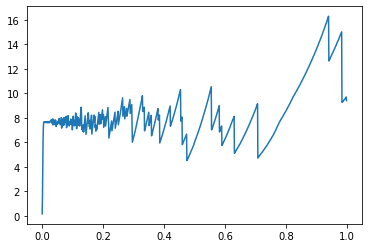

In [151]:
regr = GradientLR(0.001, iterations=100)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [242]:
X, y = read_data('spam.csv')
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [243]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.18909584599549992


0.18847054874355906


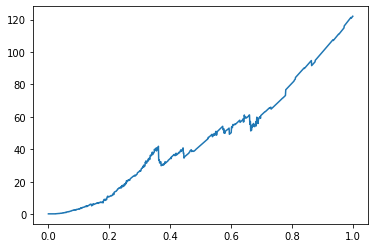

In [244]:
regr = GradientLR(0.001, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

In [246]:
X = pd.read_csv('cancer.csv')
y = X['label']
X = X.drop('label', axis=1)
le = LabelEncoder()
y = le.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.059868759834408536


0.06018665500471529


d:\programs\интрепретатор python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


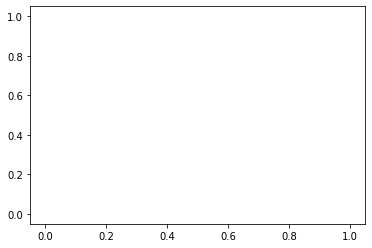

In [247]:
regr = GradientLR(0.001, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)